In [2]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.12.0


In [3]:
# Zero dimensional tensor
zero_dim_tensor = tf.constant(20)
print(zero_dim_tensor)

# One dimensional tensor
one_dim_tensor = tf.constant([12, 20, 53, 26, 11, 56])
print(one_dim_tensor)

# Two dimensional tensor
two_dim_array = [[3, 6, 7, 5],
             	[9, 2, 3, 4],
             	[7, 1, 10,6],
             	[0, 8, 11,2]]

two_dim_tensor = tf.constant(two_dim_array)
print(two_dim_tensor)

tf.Tensor(20, shape=(), dtype=int32)
tf.Tensor([12 20 53 26 11 56], shape=(6,), dtype=int32)
tf.Tensor(
[[ 3  6  7  5]
 [ 9  2  3  4]
 [ 7  1 10  6]
 [ 0  8 11  2]], shape=(4, 4), dtype=int32)


## Constants
Constants are tensors whose values do not change during the execution of the computational graph. They are created using the tf.constant() function and are mainly used to store fixed parameters that do not require any change during the model training.

## Variables
Variables are tensors whose value can be changed during the execution of the computational graph and they are created using the tf.Variable() function. For instance, in the case of neural networks, weights, and biases can be defined as variables since they need to be updated during the training process. 

## Placeholders
These were used in the first version of Tensorflow as empty containers that do not have specific values. They are just used to reverse a spot for data to be used in the future. This gives the users the freedom to use different datasets and batch sizes during model training and validation.

In Tensorflow version 2, placeholders have been replaced by the tf.function() function, which is a more Pythonic and dynamic approach to feeding data into the computational graph. 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10 as cf10

In [7]:
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cf10.load_data()

In [8]:
# 1. Function for showing images
def show_images(train_images, 
                class_names, 
                train_labels, 
                nb_samples = 12, nb_row = 4):
    
    plt.figure(figsize=(12, 12))
    for i in range(nb_samples):
        plt.subplot(nb_row, nb_row, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i][0]])
    plt.show()

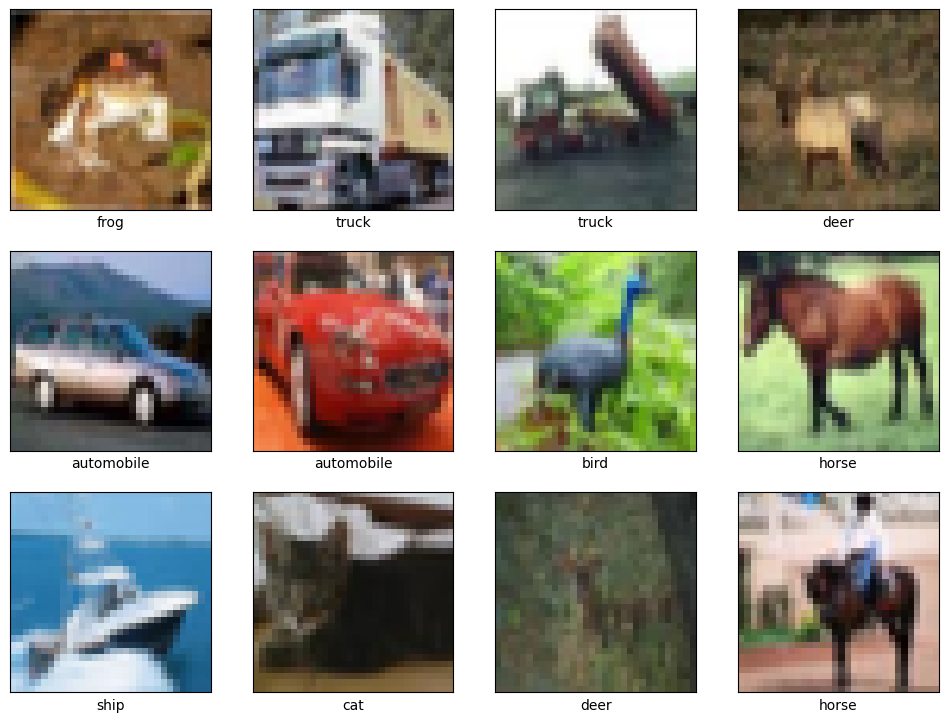

In [9]:
# Visualize some sample images from the dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

show_images(train_images, class_names, train_labels)

In [10]:
from tensorflow.keras.utils import to_categorical

# Data normalization
max_pixel_value = 255

train_images = train_images / max_pixel_value
test_images = test_images / max_pixel_value

# One-hot encode the labels
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels, len(class_names))
test_labels = to_categorical(test_labels, len(class_names))

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Variables
INPUT_SHAPE = (32, 32, 3)
FILTER1_SIZE = 32
FILTER2_SIZE = 64
FILTER_SHAPE = (3, 3)
POOL_SHAPE = (2, 2)
FULLY_CONNECT_NUM = 128
NUM_CLASSES = len(class_names)

# Model architecture implementation
model = Sequential()
model.add(Conv2D(FILTER1_SIZE, FILTER_SHAPE, activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Conv2D(FILTER2_SIZE, FILTER_SHAPE, activation='relu'))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Flatten())
model.add(Dense(FULLY_CONNECT_NUM, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [14]:
from tensorflow.keras.metrics import Precision, Recall

BATCH_SIZE = 32
EPOCHS = 5

METRICS = metrics=['accuracy', 
                   Precision(name='precision'),
                   Recall(name='recall')]

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = METRICS)

# Train the model
training_history = model.fit(train_images, train_labels, 
                    epochs=EPOCHS, batch_size=BATCH_SIZE,
                    validation_data=(test_images, test_labels))

Epoch 1/5
1563/1563 [==============================] - 30s 19ms/step - loss: 1.3138 - accuracy: 0.5315 - precision: 0.7259 - recall: 0.3216 - val_loss: 1.0889 - val_accuracy: 0.6174 - val_precision: 0.7709 - val_recall: 0.4461
Epoch 2/5
1563/1563 [==============================] - 39s 25ms/step - loss: 1.0318 - accuracy: 0.6376 - precision: 0.7719 - recall: 0.5010 - val_loss: 0.9976 - val_accuracy: 0.6496 - val_precision: 0.7663 - val_recall: 0.5320
Epoch 3/5
1563/1563 [==============================] - 45s 29ms/step - loss: 0.8993 - accuracy: 0.6861 - precision: 0.7956 - recall: 0.5779 - val_loss: 0.9060 - val_accuracy: 0.6863 - val_precision: 0.7896 - val_recall: 0.5771
Epoch 4/5
1563/1563 [==============================] - 50s 32ms/step - loss: 0.8015 - accuracy: 0.7203 - precision: 0.8138 - recall: 0.6295 - val_loss: 0.8837 - val_accuracy: 0.6933 - val_precision: 0.7941 - val_recall: 0.6028
Epoch 5/5
1563/1563 [==============================] - 46s 29ms/step - loss: 0.7202 - accura

In [15]:
import matplotlib.pyplot as plt
    
def show_performance_curve(training_result, metric, metric_label):
    
    train_perf = training_result.history[str(metric)]
    validation_perf = training_result.history['val_'+str(metric)]
    intersection_idx = np.argwhere(np.isclose(train_perf, 
                                                validation_perf, atol=1e-2)).flatten()[0]
    intersection_value = train_perf[intersection_idx]
    
    plt.plot(train_perf, label=metric_label)
    plt.plot(validation_perf, label = 'val_'+str(metric))
    plt.axvline(x=intersection_idx, color='r', linestyle='--', label='Intersection')
    
    plt.annotate(f'Optimal Value: {intersection_value:.4f}',
             xy=(intersection_idx, intersection_value),
             xycoords='data',
             fontsize=10,
             color='green')
                 
    plt.xlabel('Epoch')
    plt.ylabel(metric_label)
    plt.legend(loc='lower right')

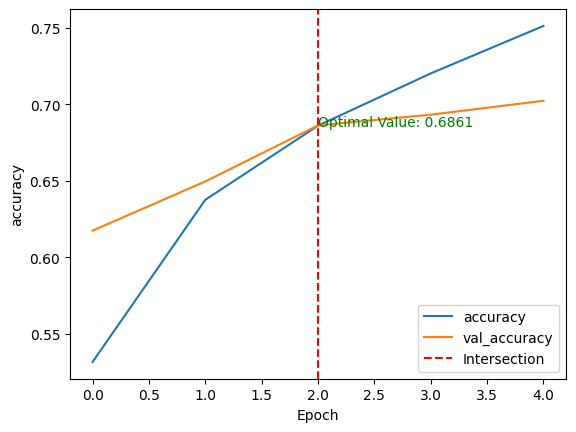

In [16]:
#test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
show_performance_curve(training_history, 'accuracy', 'accuracy')

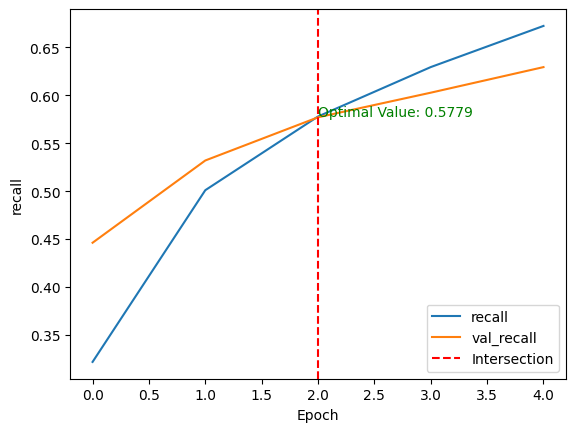

In [17]:
show_performance_curve(training_history, 'recall', 'recall')

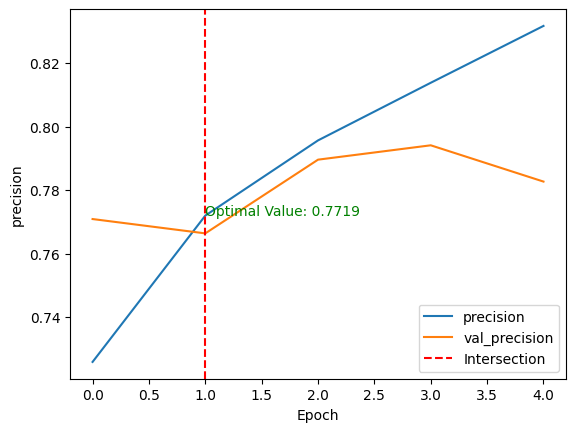

In [18]:
show_performance_curve(training_history, 'precision', 'precision')

313/313 [==============================] - 4s 13ms/step


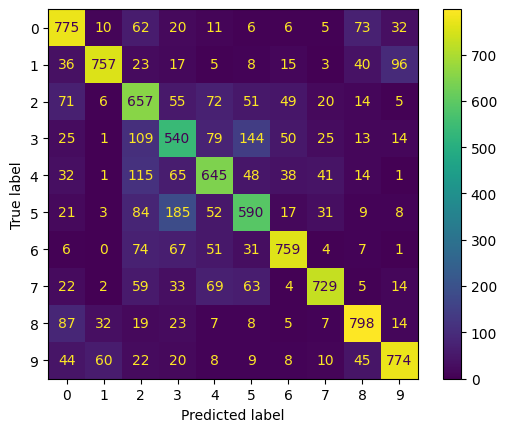

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Obtain the model's predictions on the test dataset
test_predictions = model.predict(test_images)

# Convert predictions from probabilities to class labels
test_predicted_labels = np.argmax(test_predictions, axis=1)

# Convert one-hot encoded true labels back to class labels
test_true_labels = np.argmax(test_labels, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_true_labels, test_predicted_labels)

# Create a ConfusionMatrixDisplay instance
cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()

## References

1. https://www.datacamp.com/tutorial/cnn-tensorflow-python
2. https://app.datacamp.com/workspace/w/2d1a3f51-ae90-41f7-bfbe-4f47b70c32e8#evaluate-the-model